In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

## Data Inspection

In [2]:
data = load_breast_cancer()
type(data) #The sklearn bunch data type is similar to a dict

sklearn.utils.Bunch

In [4]:
#let's see what data we have to work with
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [5]:
#feature list
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
#and our targets
data.target_names

array(['malignant', 'benign'], dtype='<U9')

## Load the Data

In [7]:
#we need out test and our target
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)

In [9]:
N, D = X_train.shape #Get the shape of our training data
D

30

In [10]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build and Instantiate the Model

In [11]:
# We create the model through a sequential layer, which has each layer
# activate in sequential order. The first is an Input layer
# for our data, then we pass it through the Dense layer
# which performs the sigmoid activation function on our data
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [13]:
# Now we need to compile the model. We need an optimizer to properly
# straighten our cost's curve, as the cost itself, binary cross entropy
# which is used for binary classification finally, we have our metrics, 
# which is simply trying to find the accuracy, how close we are to the target
model.compile(
    optimizer = "adam",
    loss = "BinaryCrossentropy",
    metrics = ["accuracy"]
)

## Train and Fit the Model

In [14]:
# Finally we fit our data to the model we built and compiled.
# This involves taking our data, giving us an epoch rate to
# train over the model, and validation data for the loss function
r = model.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
12/12 [==============================] - 1s 32ms/step - loss: 1.0701 - accuracy: 0.2677 - val_loss: 1.0127 - val_accuracy: 0.2872
Epoch 2/25
12/12 [==============================] - 0s 8ms/step - loss: 0.9697 - accuracy: 0.3255 - val_loss: 0.9139 - val_accuracy: 0.3404
Epoch 3/25
12/12 [==============================] - 0s 7ms/step - loss: 0.8750 - accuracy: 0.4252 - val_loss: 0.8276 - val_accuracy: 0.3883
Epoch 4/25
12/12 [==============================] - 0s 7ms/step - loss: 0.7941 - accuracy: 0.4856 - val_loss: 0.7500 - val_accuracy: 0.4840
Epoch 5/25
12/12 [==============================] - 0s 7ms/step - loss: 0.7194 - accuracy: 0.5617 - val_loss: 0.6843 - val_accuracy: 0.5851
Epoch 6/25
12/12 [==============================] - 0s 7ms/step - loss: 0.6556 - accuracy: 0.6325 - val_loss: 0.6276 - val_accuracy: 0.6436
Epoch 7/25
12/12 [==============================] - 0s 7ms/step - loss: 0.6010 - accuracy: 0.6955 - val_loss: 0.5784 - val_accuracy: 0.6862
Epoch 8/25
12/12 [=

## Evaluate the Model

In [15]:
# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.9528
Train score: [0.25165361166000366, 0.9527559280395508]
6/6 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9309
Test score: [0.26807212829589844, 0.9308510422706604]


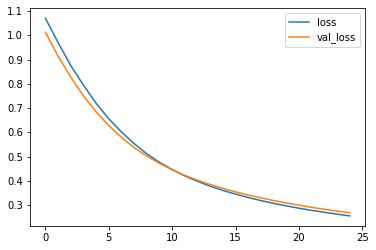

In [16]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

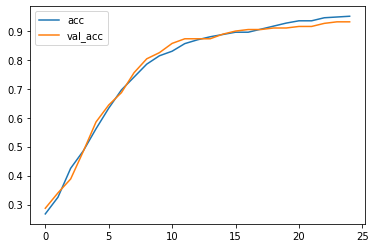

In [17]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()